<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Projects/blob/main/X-ray%20Implant%20Identification/Implant_Identification_EDA%2BImage_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Application in Spinal Implant Identification

In [ ]:
# !nvidia-smi

## Get the data

A very crucial step at the beginning of any machine learning project is becoming one with the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Implant_data/train


Isola  Legacy  M8M10  Reline  Viper  Xia


In [4]:
!ls /content/drive/MyDrive/Implant_data/test/Xia

 67_side.jpg		 spinal_xray_2551_ML.jpg
 71.jpg			 spinal_xray_846_ML.jpg
 facebook_10347_ML.jpg	 spinal_xray_888__AP.jpg
 facebook_2150_ML.jpg	 xia1_ap_email_22feb1831.jpg
 facebook_449_ML.jpg	 xia1_ml_email_27feb1513.jpg
 facebook_5665_ML.jpg	 xia1_ml_whatzit_23feb2021.png
 facebook_7386_ML.jpg	'xio1A (13).png'
 facebook_7786_ML.jpg	'xio1A (14).png'
 facebook_8495_ML.jpg	'xio1A (15).png'
 facebook_914_ML.jpg	'xio1B_heeba (2).png'
 facebook_9622_ML.jpg


In [5]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [6]:
ls

 Akram/              Implant_data_cleaned/   reference_oct19/
'Colab Notebooks'/   Implant_data_Final/     reference_oct19_synthetic_hedi/
 data/               Latest_data_implant/   'School '/
 detr_data/          new/                    synthetic_data_28oct/
 Implant_data/       new_data/


In [7]:
!ls /content/drive/MyDrive/Implant_data/test/Reline

facebook_681_ML.jpg		reline6_ap_email_22feb1831.jpg
reline1_ml_email_22feb1831.jpg	reline8_ap_email_22feb1831.jpg
reline2_ap_email_22feb1830.jpg	reline_xray1.png
reline2_ap_email_22feb1831.jpg	s_195_4.jpg


In [8]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames, in os.walk('Implant_data'):
  print('There are ',len(dirnames), 'directories and ', len(filenames), 'images in',dirpath)

There are  2 directories and  0 images in Implant_data
There are  6 directories and  0 images in Implant_data/train
There are  0 directories and  66 images in Implant_data/train/Isola
There are  0 directories and  121 images in Implant_data/train/Legacy
There are  0 directories and  50 images in Implant_data/train/M8M10
There are  0 directories and  73 images in Implant_data/train/Reline
There are  0 directories and  94 images in Implant_data/train/Xia
There are  0 directories and  149 images in Implant_data/train/Viper
There are  6 directories and  0 images in Implant_data/test
There are  0 directories and  26 images in Implant_data/test/Legacy
There are  0 directories and  13 images in Implant_data/test/Isola
There are  0 directories and  8 images in Implant_data/test/Reline
There are  0 directories and  11 images in Implant_data/test/M8M10
There are  0 directories and  21 images in Implant_data/test/Xia
There are  0 directories and  35 images in Implant_data/test/Viper


In [9]:
num_train_data = len(os.listdir('/content/drive/MyDrive/Implant_data/test/'))
num_train_data

6

In [10]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
import random
import matplotlib.image as mpimg

data_dir = pathlib.Path('Implant_data/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
class_names

array(['Isola', 'Legacy', 'M8M10', 'Reline', 'Viper', 'Xia'], dtype='<U6')

Looking at the image shape more closely, you'll see it's in the form (Width, Height, Colour Channels).

In [11]:
def view_random_image(target_dir):

  fig , axes = plt.subplots(2,3,figsize=(15, 15))
  
  for i,ax in enumerate(axes.flat):
    target_folder = target_dir + class_names[i]
    random_image = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    ax.imshow(img)
    tit=class_names[i]
    ax.set_title(tit)
    ax.axis('off')    

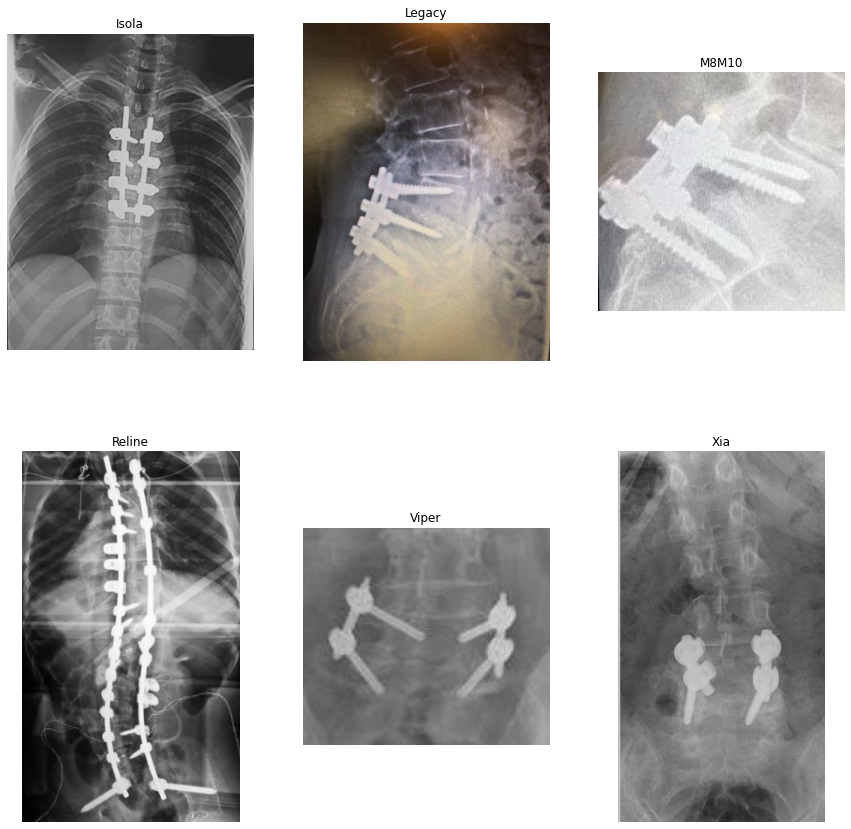

In [12]:
view_random_image('Implant_data/train/')

In [13]:
len_train_data={}
len_test_data={}

for i in os.listdir('/content/drive/MyDrive/Implant_data/train'):
  len_train_data[i] = len(os.listdir('/content/drive/MyDrive/Implant_data/train'+'/'+i))

for i in os.listdir('/content/drive/MyDrive/Implant_data/test'):
  len_test_data[i] = len(os.listdir('/content/drive/MyDrive/Implant_data/test'+'/'+i))

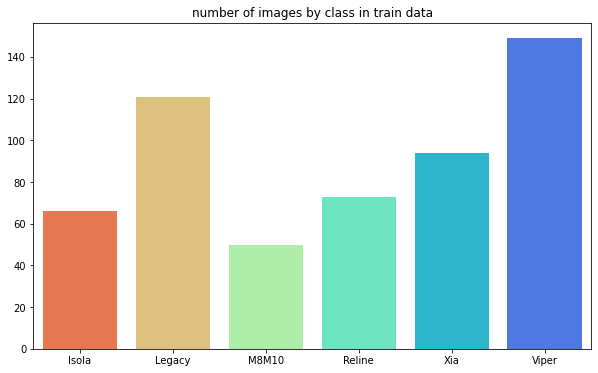

In [14]:
plt.figure(figsize=(10,6))
plt.title('number of images by class in train data')

sns.barplot(x=list(len_train_data.keys()),y=list(len_train_data.values()),palette="rainbow_r")
sns.set_theme()

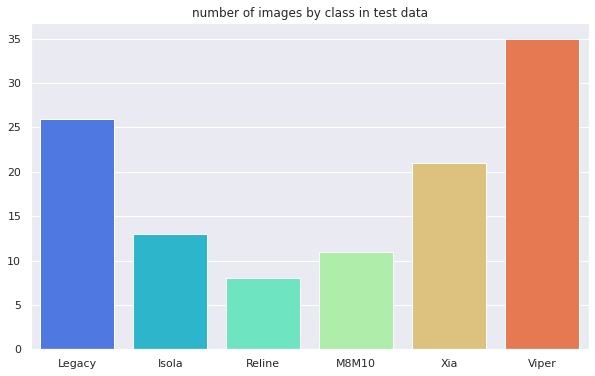

In [15]:
plt.figure(figsize=(10,6))
plt.title('number of images by class in test data')
sns.barplot(x=list(len_test_data.keys()),y=list(len_test_data.values()),palette="rainbow")
sns.set_theme()

In [16]:
dimensions=np.array([])
dim =[]

for name in class_names:
  for i in os.listdir('/content/drive/MyDrive/Implant_data/train/'+'/'+name):
    image_dim=np.array([])
    img = mpimg.imread('/content/drive/MyDrive/Implant_data/train/'+'/'+name+'/'+i)
    if len(img.shape)==2:
      img=img.reshape(img.shape+(1,)) 
    image_dim=np.append(image_dim,list((img.shape)))
    image_dim=np.append(image_dim,name)
    dim.append(image_dim)


In [17]:
shapes_df = pd.DataFrame(dim,columns=('w','h','c','class'))
shapes_df[['w','h','c']]=shapes_df[['w','h','c']].astype(float)
shapes_df[['w','h','c']]=shapes_df[['w','h','c']].astype(int)

shapes_df.head()

,w,h,c,class
0,600,491,3,Isola
1,167,125,3,Isola
2,600,499,3,Isola
3,494,600,3,Isola
4,600,576,3,Isola


In [18]:
shapes_df['c'].value_counts()

3    552
1      1
Name: c, dtype: int64

In [19]:
shapes_df.fillna(1,inplace=True)

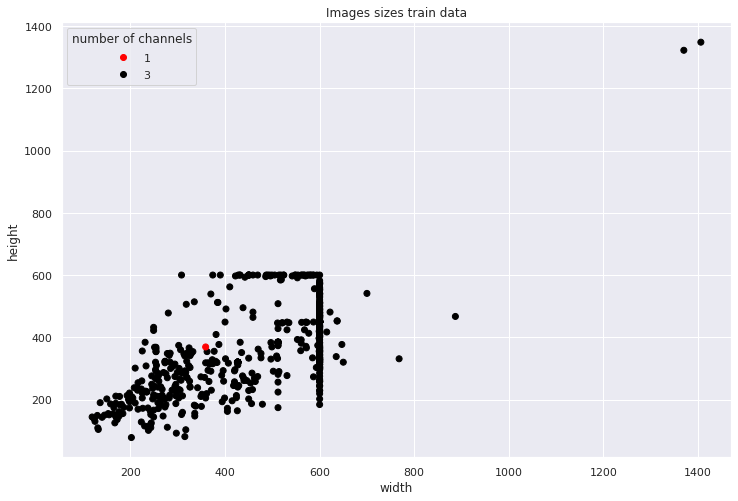

In [20]:
plt.figure(figsize=(12,8))
plt.title('Images sizes train data')
plt.xlabel('width')
plt.ylabel('height')

scatter = plt.scatter(x=shapes_df['w'],y=shapes_df['h'],c=list(shapes_df.c),cmap='flag')
plt.legend(*scatter.legend_elements(),title='number of channels')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


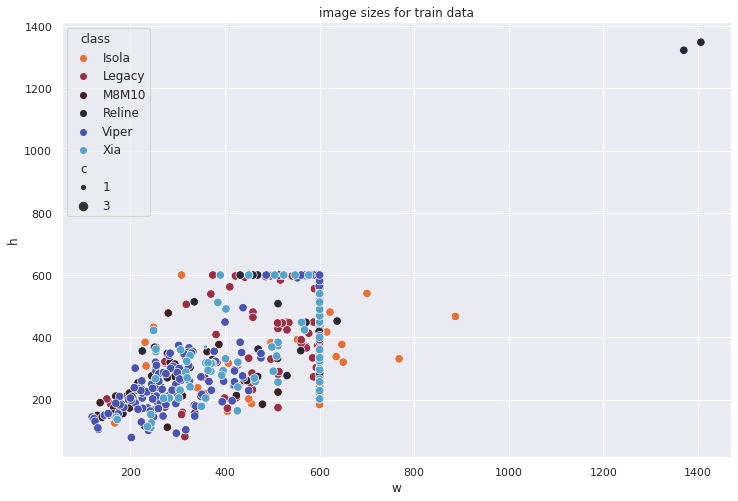

In [21]:
plt.figure(figsize=(12,8))
plt.title('image sizes for train data')

sns.scatterplot('w', 'h', data=shapes_df, hue='class',palette='icefire_r',size='c')

In [22]:
dim_test =[]

for name in class_names:
  for i in os.listdir('/content/drive/MyDrive/Implant_data/test/'+'/'+name):
    image_dim=np.array([])
    img = mpimg.imread('/content/drive/MyDrive/Implant_data/test/'+'/'+name+'/'+i)
    if len(img.shape)==2:
      img=img.reshape(img.shape+(1,)) 
    image_dim=np.append(image_dim,list((img.shape)))
    image_dim=np.append(image_dim,name)
    dim_test.append(image_dim)


In [23]:
shapes_df_test = pd.DataFrame(dim_test,columns=('w','h','c','class'))
shapes_df_test[['w','h','c']]=shapes_df_test[['w','h','c']].astype(float)
shapes_df_test[['w','h','c']]=shapes_df_test[['w','h','c']].astype(int)

shapes_df_test.head()

,w,h,c,class
0,427,320,3,Isola
1,682,347,4,Isola
2,381,223,4,Isola
3,640,418,4,Isola
4,734,264,4,Isola


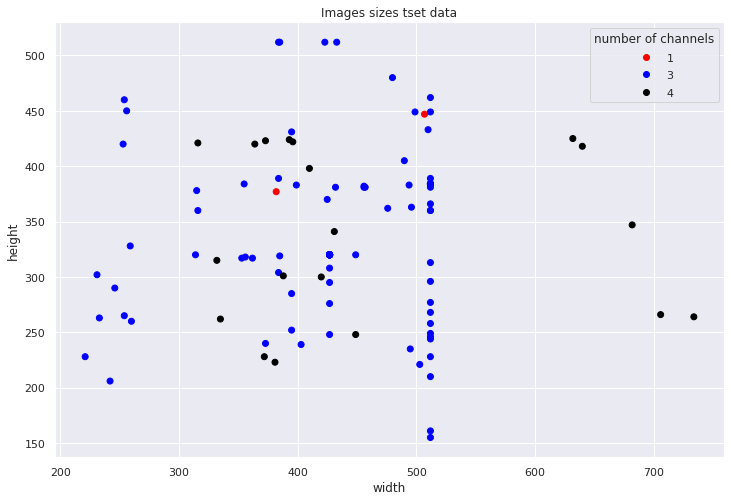

In [24]:
plt.figure(figsize=(12,8))
plt.title('Images sizes tset data')
plt.xlabel('width')
plt.ylabel('height')

scatter = plt.scatter(x=shapes_df_test['w'],y=shapes_df_test['h'],c=list(shapes_df_test.c),cmap='flag')
plt.legend(*scatter.legend_elements(),title='number of channels')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


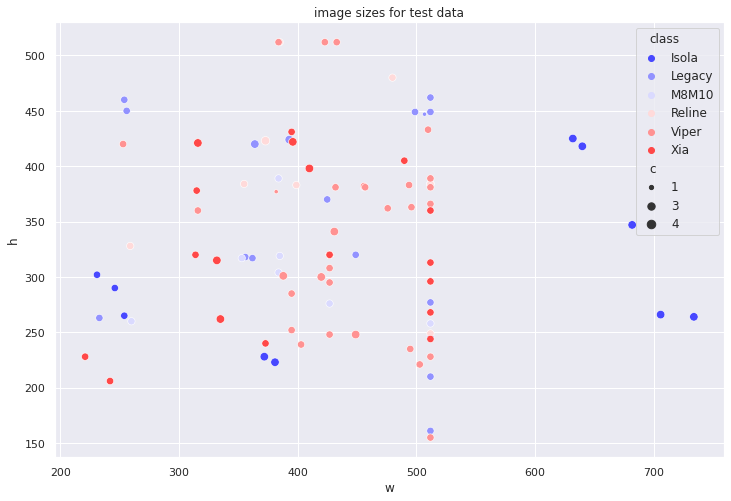

In [25]:
plt.figure(figsize=(12,8))
plt.title('image sizes for test data');
sns.scatterplot('w', 'h', data=shapes_df_test, hue='class',palette='bwr',size='c');

In [26]:
imageWithOneChannel=mpimg.imread('/content/drive/MyDrive/Implant_data/train/Xia/spinal_xray_525_ML.jpg')
imageWithOneChannel.shape

(359, 369)

an example of image with one channel


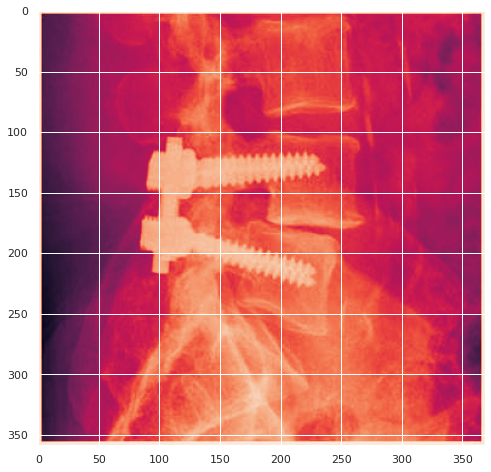

In [27]:
print('an example of image with one channel')
plt.figure(figsize=(12,8))
plt.imshow(imageWithOneChannel);

# Data Preprocessing

### BaseModel using gray color

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1/255.,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = 'Implant_data/train'
test_dir = 'Implant_data/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(300,300),
                                               color_mode='grayscale',class_mode="categorical",shuffle=True,subset='training')

valid_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(300,300),
                                               color_mode='grayscale',class_mode="categorical",shuffle=True,subset='validation')

test_data = test_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(300,300),
                                               color_mode='grayscale',class_mode="categorical",shuffle=True)


Found 445 images belonging to 6 classes.
Found 108 images belonging to 6 classes.
Found 114 images belonging to 6 classes.


In [29]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(300,300,1)),
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(6,activation='sigmoid')
])


model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_1 = model_1.fit(train_data,epochs=4,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/4
14/14 [==============================] - 50s 3s/step - loss: 1.7619 - accuracy: 0.2539 - val_loss: 1.7228 - val_accuracy: 0.2685
Epoch 2/4
14/14 [==============================] - 48s 3s/step - loss: 1.7257 - accuracy: 0.2764 - val_loss: 1.7379 - val_accuracy: 0.2685
Epoch 3/4
14/14 [==============================] - 47s 3s/step - loss: 1.7068 - accuracy: 0.2742 - val_loss: 1.7204 - val_accuracy: 0.2778
Epoch 4/4
14/14 [==============================] - 48s 3s/step - loss: 1.6527 - accuracy: 0.3056 - val_loss: 1.7286 - val_accuracy: 0.2778


### BaseModel using RGB colors

In [30]:
tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1/255.,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = 'Implant_data/train'
test_dir = 'Implant_data/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(300,300),
                                               color_mode='rgb',class_mode="categorical",shuffle=True,subset='training')

valid_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(300,300),
                                               color_mode='rgb',class_mode="categorical",shuffle=True,subset='validation')

test_data = test_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(300,300),
                                               color_mode='rgb',class_mode="categorical",shuffle=True)

Found 445 images belonging to 6 classes.
Found 108 images belonging to 6 classes.
Found 114 images belonging to 6 classes.


In [31]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(300,300,3)),
                                      # tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
                                      # tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(6,activation='sigmoid')
])


model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['accuracy'])

history_1 = model_1.fit(train_data,epochs=4,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/4
14/14 [==============================] - 25s 2s/step - loss: 1.7814 - accuracy: 0.2494 - val_loss: 1.7684 - val_accuracy: 0.1574
Epoch 2/4
14/14 [==============================] - 23s 2s/step - loss: 1.7237 - accuracy: 0.2652 - val_loss: 1.7394 - val_accuracy: 0.2685
Epoch 3/4
14/14 [==============================] - 23s 2s/step - loss: 1.6769 - accuracy: 0.3034 - val_loss: 1.7325 - val_accuracy: 0.3519
Epoch 4/4
14/14 [==============================] - 24s 2s/step - loss: 1.6305 - accuracy: 0.3506 - val_loss: 1.7258 - val_accuracy: 0.2685


## Enhancemt Quality of Images

### 1. equalization

1. **Histogram Equalization (HE) is a statistical approach for spreading out intensity values.**
2. **It used for improving the contrast of any image, that is- to make the dark portion darker and the bright portion brighter.**

In [32]:
test1 = mpimg.imread('Implant_data/train/Viper/'+((random.sample(os.listdir('Implant_data/train/Viper/'),1))[0]))
test2 = mpimg.imread('Implant_data/train/Legacy/'+((random.sample(os.listdir('Implant_data/train/Legacy/'),1))[0]))
test3 = mpimg.imread('Implant_data/train/Isola/'+((random.sample(os.listdir('Implant_data/train/Isola/'),1))[0]))

def explore_images(func):

  fig , ax = plt.subplots(2,3,sharex=True,sharey=True,figsize=(12,12))

  ax[0,0].imshow(test1)
  ax[0,0].axis(False)
  ax[0,0].title.set_text('Original')

  ax[1,0].imshow(func(test1))
  ax[1,0].axis(False)
  ax[1,0].title.set_text('after')

  ax[0,1].imshow(test2)
  ax[0,1].axis(False)
  ax[0,1].title.set_text('Original')

  ax[1,1].imshow(func(test2))
  ax[1,1].axis(False)
  ax[1,1].title.set_text('after')

  ax[0,2].imshow(test3)
  ax[0,2].axis(False)
  ax[0,2].title.set_text('Original')

  ax[1,2].imshow(func(test3))
  ax[1,2].axis(False)
  ax[1,2].title.set_text('after')


  plt.subplots_adjust(wspace=0.1, hspace=0.1)

In [33]:
def png_jpg(img):
  if img.dtype in ['float32','float64']:
    img = img*255
    img = img.astype(np.uint8)
  else:
    img=img
  return img


In [34]:
def equalizer(img):
  img = png_jpg(img)
  if len(img.shape)>2:

    if img.shape[2]==3:
      img = img.astype(np.uint8)
      R, G, B = cv2.split(img)
      output1_R = cv2.equalizeHist(R)
      output1_G = cv2.equalizeHist(G)
      output1_B = cv2.equalizeHist(B)
      equ = cv2.merge((output1_R, output1_G, output1_B))

    elif img.shape[2]==4:
      img = img.astype(np.uint8)
      R, G, B , other = cv2.split(img)
      output1_R = cv2.equalizeHist(R)
      output1_G = cv2.equalizeHist(G)
      output1_B = cv2.equalizeHist(B)
      output1_other = cv2.equalizeHist(other)
      equ = cv2.merge((output1_R, output1_G, output1_B,output1_other))

    else:
      img = img.astype(np.uint8)
      equ = cv2.equalizeHist(img)
  else:
    img = img.astype(np.uint8)
    equ = cv2.equalizeHist(img)

  return equ

equalizer doesnot work with png

In [45]:
oneChannel_Image = mpimg.imread('/content/drive/MyDrive/Implant_data/train/Xia/spinal_xray_525_ML.jpg')
threeChannel_Image = mpimg.imread('Implant_data/train/Viper/viper_ pmc5153911_2_cropped.jpg')

threeChannel_Image.shape

(125, 130, 3)

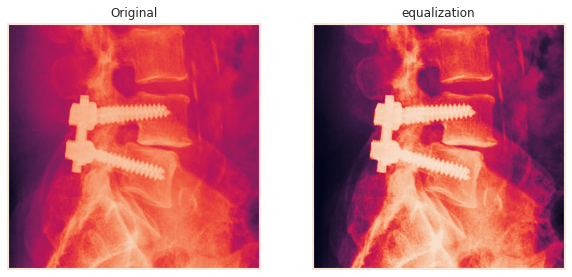

In [46]:
fig , (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,10))

ax1.imshow(oneChannel_Image)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(equalizer(oneChannel_Image))
ax2.axis(False)
ax2.title.set_text('equalization')

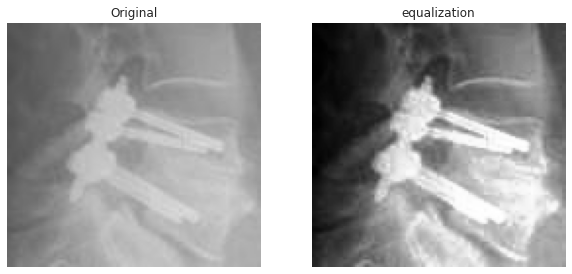

In [48]:
fig , (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,10))

ax1.imshow(threeChannel_Image)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(equalizer(threeChannel_Image))
ax2.axis(False)
ax2.title.set_text('equalization')

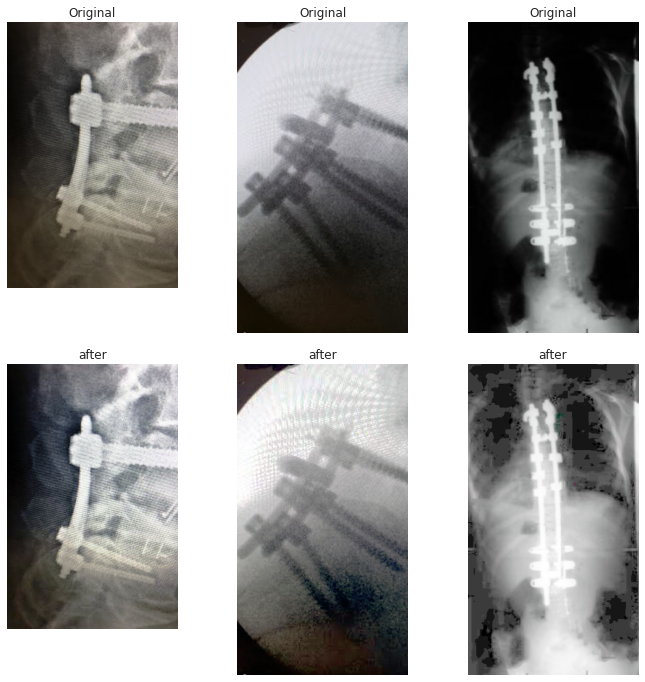

In [49]:
explore_images(equalizer)

### 2. CLAHE (Contrast Limited Adaptive Histogram Equalization)

**1. A technique to enhance the visibility of local details of an image by increasing the contrast in local regions.**

**2. It takes care of over-amplification of the contrast**

In [50]:
def clahe(img):
  img = png_jpg(img)
  if len(img.shape)>2:
    if img.shape[2] ==4:
      
      R, G, B , other = cv2.split(img)
      output1_R = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(R)
      output1_G = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(G)
      output1_B = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(B)
      output1_other = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(other)
      clah = cv2.merge((output1_R, output1_G, output1_B, output1_other))

    elif img.shape[2] ==3:
      R, G, B  = cv2.split(img)
      output1_R = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(R)
      output1_G = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(G)
      output1_B = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(B)
      clah = cv2.merge((output1_R, output1_G, output1_B))

    else:
      clah = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

  else:
    clah = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

  return clah

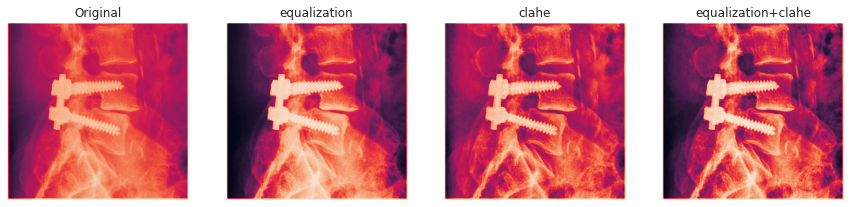

In [51]:
fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharex=True,sharey=True,figsize=(15,15))

ax1.imshow(oneChannel_Image)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(equalizer(oneChannel_Image))
ax2.axis(False)
ax2.title.set_text('equalization')

ax3.imshow(clahe(oneChannel_Image))
ax3.axis(False)
ax3.title.set_text('clahe')

ax4.imshow(clahe(equalizer(oneChannel_Image)))
ax4.axis(False)
ax4.title.set_text('equalization+clahe')

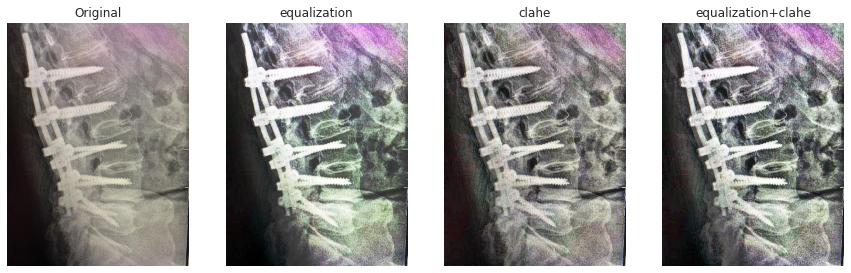

In [52]:
example_image = mpimg.imread('Implant_data/train/Viper/facebook_6361_ML.jpg')

fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharex=True,sharey=True,figsize=(15,15))

ax1.imshow(example_image)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(equalizer(example_image))
ax2.axis(False)
ax2.title.set_text('equalization')

ax3.imshow(clahe(example_image))
ax3.axis(False)
ax3.title.set_text('clahe')

ax4.imshow(clahe(equalizer(example_image)))
ax4.axis(False)
ax4.title.set_text('equalization+clahe')

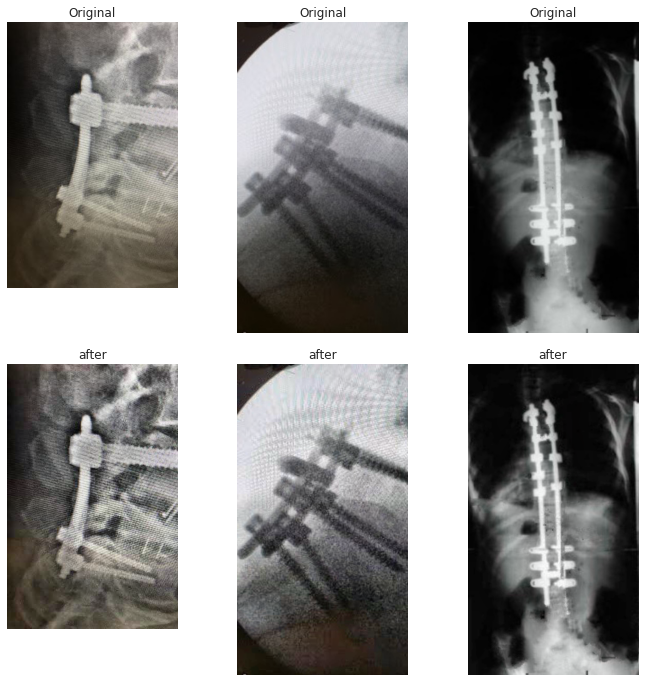

In [53]:
explore_images(clahe)

### 3. denoising 

In [54]:
def denoising(img):
  if len(img.shape)>2:
    if img.shape[2]==3:
      dst = cv2.fastNlMeansDenoisingColored(png_jpg(img),None,10,10,7,21)
    elif img.shape[2]==4:
      dst = cv2.fastNlMeansDenoisingColored(png_jpg(img[:,:,:3]),None,10,10,7,21)
    else:
      dst = cv2.fastNlMeansDenoising(png_jpg(img))
  else:
    dst = cv2.fastNlMeansDenoising(png_jpg(img))
  return dst

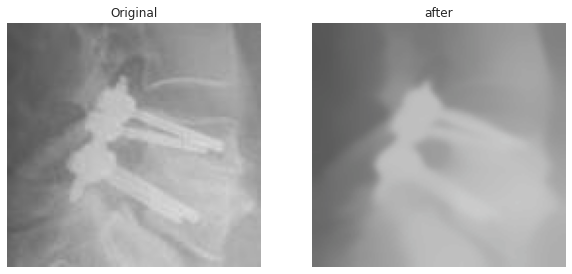

In [56]:
fig , (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,10))
example=(denoising(threeChannel_Image))
ax1.imshow(threeChannel_Image)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(example)
ax2.axis(False)
ax2.title.set_text('after')

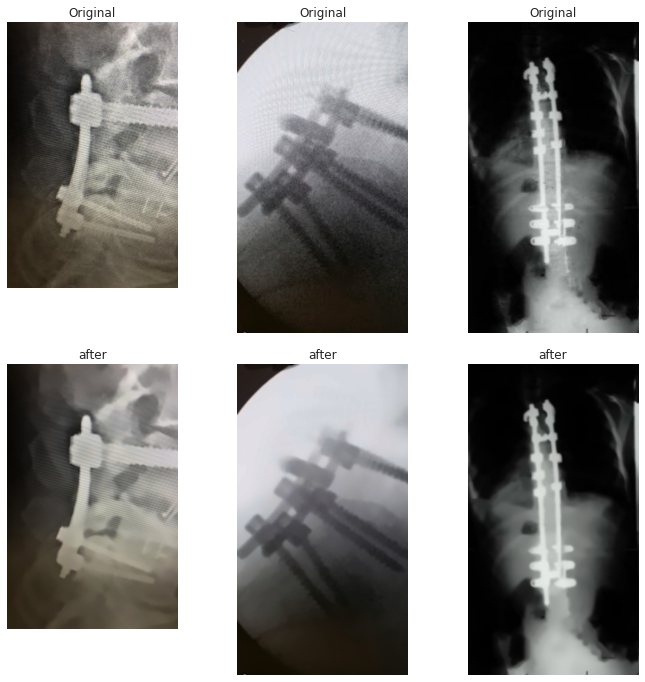

In [57]:
explore_images(denoising)

### 4. Log low transformer

In [58]:
def log_low_trasformer(img):

  R, G, B  = cv2.split(img)
  output1_R = cv2.pow(R.astype(np.float32),1.1)
  output1_G = cv2.pow(G.astype(np.float32),1.1)
  output1_B = cv2.pow(B.astype(np.float32),1.1)
  im = cv2.merge((output1_R, output1_G, output1_B))
  im = im.astype(np.uint8)

  return im

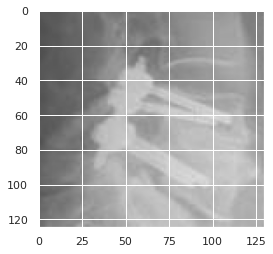

In [59]:
plt.imshow(threeChannel_Image)

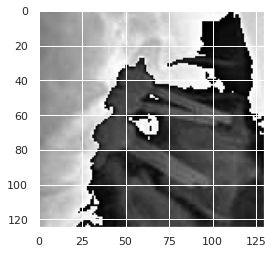

In [60]:
plt.imshow(log_low_trasformer(threeChannel_Image))

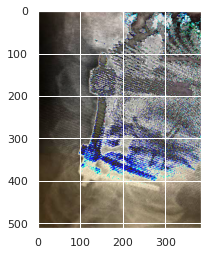

In [61]:
plt.imshow(log_low_trasformer(test1))

**Notes:**

* All enhancement quality images functions are working properly with single channel. I seperate image channels using split function into R,G,B layers.
* Most of functions fail with images that dtype of array is **float**, so I convert them into np.uint8 type within range of 0-255.
* choosing the suitable enhancement function based on model's accuracy. Experiment, Experiment, Experiment.

### Any enquiries
Done by Mohammad Zahrawi


eng.moh.zahrawi@gmail.com